<a href="https://colab.research.google.com/github/TW-ZJLin/FiniteDifference/blob/main/Finite_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [1]:
import matplotlib.pyplot as plt

### Forward Difference

In [2]:
def ForwardDifference( x, y = None, neighbor = 1 ):
  if y: # for 2 inputs
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return 0
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = y_diff + [ y_diff[-1] for i in range(neighbor) ]
    return y_diff

  else: # for 1 input
    x_diff = [ ( x[i+neighbor] - x[i] )/neighbor for i in range(len(x)-neighbor) ]
    x_diff = x_diff + [ x_diff[-1] for i in range(neighbor) ]
    return x_diff

### Central Difference

In [3]:
def CentralDifference( x, y = None, neighbor = 1 ):
  if y: # for 2 input
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+2*neighbor] - y[i] )/( x[i+2*neighbor] - x[i] ) for i in range(len(y)-2*neighbor) ]
    y_diff = [ ( y[i+neighbor] - y[0] )/( x[i+neighbor] - x[0] ) for i in range(neighbor)] + y_diff +\
        [ ( y[-1] - y[-2*neighbor+i] )/( x[-1] - x[-2*neighbor+i] ) for i in range(neighbor)]
    return y_diff

  else: # for 1 input
    x_diff = [ ( x[i+2*neighbor] - x[i] )/(2*neighbor) for i in range(len(x)-2*neighbor) ]
    x_diff = [ ( x[i+neighbor] - x[0] )/(i+neighbor) for i in range(neighbor)] + x_diff +\
        [ ( x[-1] - x[-2*neighbor+i] )/( 2*neighbor-i-1 ) for i in range(neighbor)]
    return x_diff

### Backward Difference

In [4]:
def BackwardDifference( x, y = None, neighbor = 1 ):
  if y: # for 2 input
    if len(x) != len(y):
      print("Two vectors are not the same length!")
      return
    y_diff = [ ( y[i+neighbor] - y[i] )/( x[i+neighbor] - x[i] ) for i in range(len(y)-neighbor) ]
    y_diff = [ y_diff[0] for i in range(neighbor) ] + y_diff
    return y_diff
  
  else: # for 1 input
    x_diff = [ ( x[i+neighbor] - x[i] )/neighbor for i in range(len(x)-neighbor) ]
    x_diff = [ x_diff[0] for i in range(neighbor) ] + x_diff
    return x_diff

### Function

In [5]:
# the objective function
def ObjectiveFunction(x):
  return 4*x**5 + 12*x**3 + 15*x**2 - 20*x + 8

#first-order differentiation of the function
def FunctionDiff1(x):
  return 20*x**4 + 36*x**2 + 30*x - 20

#second-order differentiation of the function
def FunctionDiff2(x):
  return 80*x**3 + 72*x + 30

### Analytic Differentiation

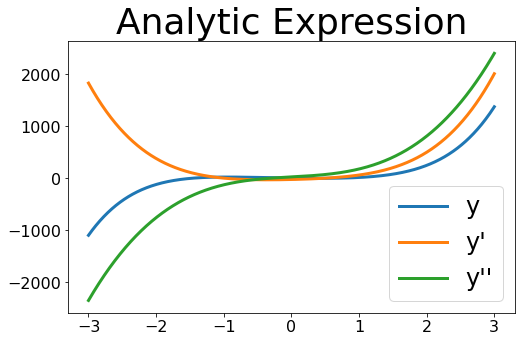

In [6]:
# generating x from -3 to 3 i.e. x belongs to set [-3,3]
Points = 1001
begin = -3
end = 3
x = [ begin+(end-begin)*i/(Points-1) for i in range(Points) ]

# generating y & derivative of y
y = [ ObjectiveFunction(x[i]) for i in range(Points) ]
y_diff1 = [ FunctionDiff1(x[i]) for i in range(Points) ]
y_diff2 = [ FunctionDiff2(x[i]) for i in range(Points) ]

# show analytic function
fig,axes=plt.subplots(1,1,figsize=(8,5),facecolor='w')
plt.plot( x, y, x, y_diff1, x, y_diff2, linewidth=3.0 )
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Analytic Expression",fontsize=36)
plt.legend(["y","y'","y''"],fontsize=24)
plt.show()

### Numerical Differentiation

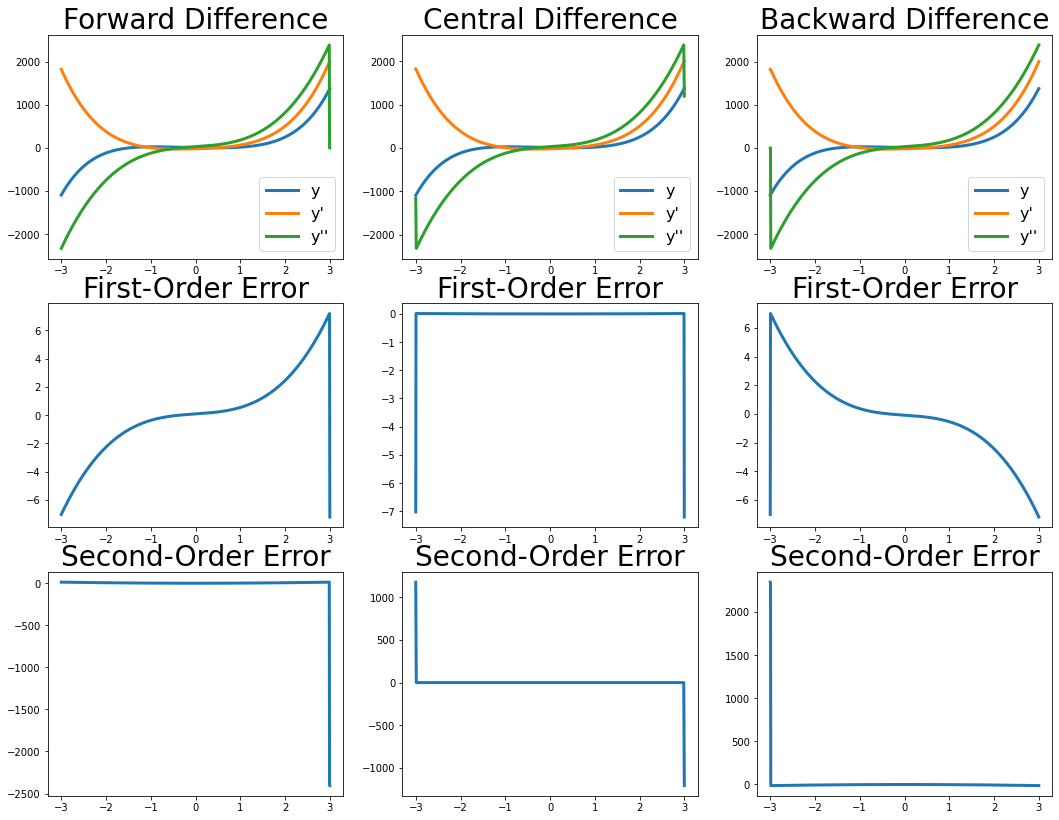

In [7]:
fig,axes=plt.subplots(3,3,figsize=(18,14),facecolor='w')

# for 2 inputs case
F_y_diff1 = ForwardDifference( x,y )
F_y_diff2 = ForwardDifference( x,F_y_diff1 )
C_y_diff1 = CentralDifference( x,y )
C_y_diff2 = CentralDifference( x,C_y_diff1 )
B_y_diff1 = BackwardDifference( x,y )
B_y_diff2 = BackwardDifference( x,B_y_diff1 )

# calculating error between analytic and numerical results
F_First_Error = [ F_y_diff1[i]-y_diff1[i] for i in range(len(y))]
C_First_Error = [ C_y_diff1[i]-y_diff1[i] for i in range(len(y))]
B_First_Error = [ B_y_diff1[i]-y_diff1[i] for i in range(len(y))]
F_Second_Error = [ F_y_diff2[i]-y_diff2[i] for i in range(len(y))]
C_Second_Error = [ C_y_diff2[i]-y_diff2[i] for i in range(len(y))]
B_Second_Error = [ B_y_diff2[i]-y_diff2[i] for i in range(len(y))]

# figure of forward finite difference
axes[0,0].plot( x,y, x,F_y_diff1, x,F_y_diff2, linewidth=3.0 )
axes[1,0].plot( x,F_First_Error, linewidth=3.0 )
axes[2,0].plot( x,F_Second_Error, linewidth=3.0 )

# figure of central finite difference
axes[0,1].plot( x,y, x,C_y_diff1, x,C_y_diff2, linewidth=3.0 )
axes[1,1].plot( x,C_First_Error, linewidth=3.0 )
axes[2,1].plot( x,C_Second_Error, linewidth=3.0 )

# figure of backward finite difference
axes[0,2].plot( x,y, x,B_y_diff1, x,B_y_diff2, linewidth=3.0 )
axes[1,2].plot( x,B_First_Error, linewidth=3.0 )
axes[2,2].plot( x,B_Second_Error, linewidth=3.0 )

# set titles and legends
axes[0,0].set_title("Forward Difference",fontsize=28)
axes[0,1].set_title("Central Difference",fontsize=28)
axes[0,2].set_title("Backward Difference",fontsize=28)
for i in range(3):
  axes[0,i].legend(["y","y'","y''"],fontsize=16)
  axes[1,i].set_title("First-Order Error",fontsize=28)
  axes[2,i].set_title("Second-Order Error",fontsize=28)

plt.show()

### Comparison Between Numpy.gradient and Finite Difference

In [8]:
import numpy as np

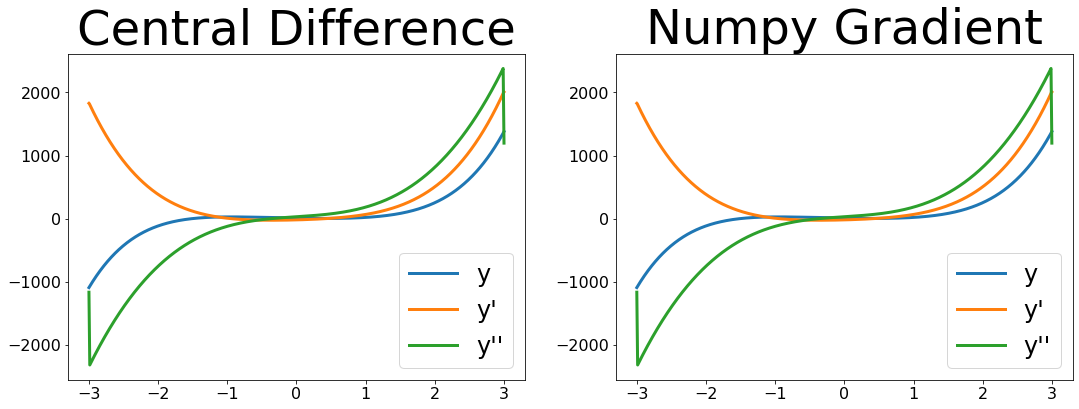

In [9]:
# calculating numpy gradient
N_y_diff1 = np.gradient(y)/(x[1]-x[0])
N_y_diff2 = np.gradient(N_y_diff1)/(x[1]-x[0])

# calculating error between analytic and numerical results
N_First_Error = [ N_y_diff1[i]-y_diff1[i] for i in range(len(y))]
N_Second_Error = [ N_y_diff2[i]-y_diff2[i] for i in range(len(y))]

# figure setting
fig,axes=plt.subplots(1,2,figsize=(18,6),facecolor='w')

# figure of central finite difference
axes[0].plot( x,y, x,C_y_diff1, x,C_y_diff2, linewidth=3.0 )

# figure of numpy gradient
axes[1].plot( x,y, x,N_y_diff1, x,N_y_diff2, linewidth=3.0 )

# set titles and legends
axes[0].set_title("Central Difference",fontsize=48)
axes[1].set_title("Numpy Gradient",fontsize=48)
axes[0].legend(["y","y'","y''"],fontsize=24)
axes[1].legend(["y","y'","y''"],fontsize=24)
axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)

plt.show()

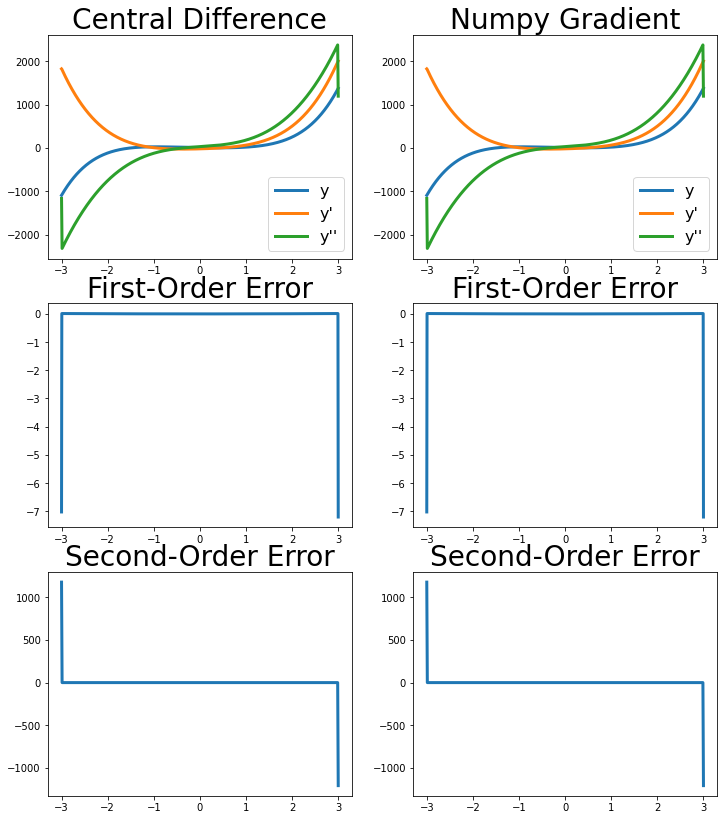

In [10]:
# calculating numpy gradient
N_y_diff1 = np.gradient(y)/(x[1]-x[0])
N_y_diff2 = np.gradient(N_y_diff1)/(x[1]-x[0])

# calculating error between analytic and numerical results
N_First_Error = [ N_y_diff1[i]-y_diff1[i] for i in range(len(y))]
N_Second_Error = [ N_y_diff2[i]-y_diff2[i] for i in range(len(y))]

# figure setting
fig,axes=plt.subplots(3,2,figsize=(12,14),facecolor='w')

# figure of central finite difference
axes[0,0].plot( x,y, x,C_y_diff1, x,C_y_diff2, linewidth=3.0 )
axes[1,0].plot( x,C_First_Error, linewidth=3.0 )
axes[2,0].plot( x,C_Second_Error, linewidth=3.0 )

# figure of numpy gradient
axes[0,1].plot( x,y, x,N_y_diff1, x,N_y_diff2, linewidth=3.0 )
axes[1,1].plot( x,N_First_Error, linewidth=3.0 )
axes[2,1].plot( x,N_Second_Error, linewidth=3.0 )

# set titles and legends
axes[0,0].set_title("Central Difference",fontsize=28)
axes[0,1].set_title("Numpy Gradient",fontsize=28)
for i in range(2):
  axes[0,i].legend(["y","y'","y''"],fontsize=16)
  axes[1,i].set_title("First-Order Error",fontsize=28)
  axes[2,i].set_title("Second-Order Error",fontsize=28)

plt.show()